In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


import hashlib
%matplotlib inline

sns.set(style="dark")
plt.style.use("ggplot")

In [2]:
survey_data = pd.read_csv(r"Survey.csv")

In [3]:
survey_data = pd.read_csv(r"Survey.csv").iloc[:,5::]
pop_data = survey_data.where(survey_data['Music Preference #1'] == 'Pop')
rbsoul_data = survey_data.where(survey_data['Music Preference #1'] == 'R&B/Soul')
rap_data = survey_data.where(survey_data['Music Preference #1'] == 'Rap/Hip Hop')
country_data = survey_data.where(survey_data['Music Preference #1'] == 'Country')
rock_data = survey_data.where(survey_data['Music Preference #1'] == 'Rock')

In [4]:
pop_data.head(100)

,Music Preference #1,Music Preference #2,I enjoy going to a new restaurant,I enjoy hearing new ideas,I would go on a spontaneous road trip,I engage in theoretical or philosophical discussion,I like to daydream throughout the day,I think all genres of music are enjoyable,I am more comfortable doing things the way that I usually do them,I like experiencing new cultures,...,I easily get jealous of my friends,I am overwhelmed when something negative happens that affects me directly,Past experiences affect how I approach certain situations,I am a moody person,It takes a lot to get me angry,I feel comfortable with myself at all times,I worry about a lot of things and can be easily overwhelmed,I tend to think about what could go wrong instead of what possibilities could happen if it goes right,I often feel as though my day is ruined when something negative occurs,I am generally happy throughout the day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pop,R&B,5.0,4.0,3.0,2.0,4.0,4.0,5.0,5.0,...,4.0,5.0,4.0,2.0,4.0,2.0,5.0,5.0,5.0,4.0
2,Pop,Rap/Hip Hop,4.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,...,2.0,2.0,3.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0
3,Pop,Rap/Hip Hop,5.0,5.0,5.0,1.0,3.0,2.0,4.0,4.0,...,4.0,3.0,4.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0
4,Pop,Rap/Hip Hop,4.0,5.0,2.0,3.0,4.0,2.0,5.0,4.0,...,1.0,5.0,5.0,3.0,3.0,2.0,5.0,4.0,4.0,3.0
5,Pop,Rap/Hip Hop,4.0,4.0,1.0,4.0,1.0,4.0,4.0,4.0,...,5.0,4.0,5.0,4.0,3.0,2.0,4.0,4.0,3.0,3.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pop,R&B,4.0,4.0,1.0,2.0,4.0,3.0,4.0,4.0,...,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,2.0,3.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pop_data = pop_data.iloc[:,2::].mean(0,skipna=True)
rbsoul_data = rbsoul_data.iloc[:,2::].mean(0,skipna=True)
rap_data = rap_data.iloc[:,2::].mean(0,skipna=True)
country_data = country_data.iloc[:,2::].mean(0,skipna=True)
rock_data = rock_data.iloc[:,2::].mean(0,skipna=True)

In [6]:
traits = ['Openness'] * 11 + ['Extroversion'] * 12 + \
['Agreeableness'] * 12 + ['Conscientiousness'] * 12 + ['Neuroticism'] * 14
values = [1,1,1,1,-1,1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,-1,1,-1,1,-1,1,1,-1,-1,\
          1,-1,1,-1,-1,-1,1,1,1,-1,1,-1,-1,1,-1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1]
pop_dict = {'Scores': pop_data, 'Trait': traits, 'Value': values}
rbsoul_dict = {'Scores': rbsoul_data, 'Trait': traits, 'Value': values}
rap_dict = {'Scores': rap_data, 'Trait': traits, 'Value': values}
country_dict = {'Scores': country_data, 'Trait': traits, 'Value': values}
rock_dict = {'Scores': rock_data, 'Trait': traits, 'Value': values}

pop_df = pd.DataFrame(pop_dict)
rbsoul_df = pd.DataFrame(rbsoul_dict)
rap_df = pd.DataFrame(rap_dict)
country_df = pd.DataFrame(country_dict)
rock_df = pd.DataFrame(rock_dict)
pop_df.sample(20).head(63)

,Scores,Trait,Value
I am easily distracted and cannot focus on working for a long period of time,3.85,Conscientiousness,-1
I plan things out accordingly,3.50,Conscientiousness,1
I am good at comforting people.,3.75,Agreeableness,1
I am more comfortable doing things the way that I usually do them,4.20,Openness,-1
It takes a long time to get comfortable with a new friend,3.15,Extroversion,-1
I enjoy complimenting people.,4.40,Agreeableness,1
I enjoy going to a new restaurant,4.30,Openness,1
I don’t really make time for other people.,2.45,Agreeableness,-1
I tend to adhere to my own plans and others' inputs have little effect on this.,2.45,Agreeableness,-1
I engage in theoretical or philosophical discussion,2.80,Openness,1


In [28]:
pop_df['Real Score'] = ((pop_df['Scores'] - 1) * (4/6) + 1) * pop_df['Value']
rbsoul_df['Real Score'] = ((rbsoul_df['Scores'] - 1) * (4/6) + 1) * rbsoul_df['Value']
rap_df['Real Score'] = ((rap_df['Scores'] - 1) * (4/6) + 1) * rap_df['Value']
country_df['Real Score'] = ((country_df['Scores'] - 1) * (4/6) + 1) * country_df['Value']
rock_df['Real Score'] = ((rock_df['Scores'] - 1) * (4/6) + 1) * rock_df['Value']

for dataframe in [pop_df, rbsoul_df, rap_df, country_df, rock_df]:
    for i in range(len(dataframe)):
        if dataframe['Real Score'].values[i] < 0:
            dataframe['Real Score'].values[i] = 6 + dataframe['Real Score'].values[i]

country_df.sample(20).head(20)

,Scores,Trait,Value,Real Score
I enjoy trying out different coffee shops,3.666667,Openness,1,2.777778
I approach new people easily,4.333333,Extroversion,1,3.222222
I think all genres of music are enjoyable,1.333333,Openness,1,1.222222
I often get into verbal conflicts with family members or friends.,2.000000,Agreeableness,-1,4.333333
I dislike being the center of attention,1.666667,Extroversion,-1,4.555556
I do not like having pictures being taken of me.,1.333333,Extroversion,-1,4.777778
I can effectively cope with emotions,3.333333,Neuroticism,-1,3.444444
I can effectively cope with emotions.1,3.666667,Neuroticism,-1,3.222222
Past experiences affect how I approach certain situations,4.333333,Neuroticism,-1,2.777778
I engage in theoretical or philosophical discussion,4.000000,Openness,1,3.000000


In [8]:
pop_trait_data_mean = pop_df.groupby(['Trait']).mean()['Real Score']
pop_trait_data_mean.head()

Trait
Agreeableness        3.593129
Conscientiousness    2.991667
Extroversion         3.125000
Neuroticism          3.095238
Openness             2.978788
Name: Real Score, dtype: float64

In [9]:
pop_trait_data_std = pop_df.groupby(['Trait']).std()['Real Score']
pop_trait_data_std.head()

Trait
Agreeableness        0.589418
Conscientiousness    0.454634
Extroversion         0.619730
Neuroticism          0.405487
Openness             0.539809
Name: Real Score, dtype: float64

In [10]:
rbsoul_trait_data_mean = rbsoul_df.groupby(['Trait']).mean()['Real Score']
rbsoul_trait_data_mean.head()

Trait
Agreeableness        3.503472
Conscientiousness    3.149306
Extroversion         3.062500
Neuroticism          3.032738
Openness             3.071970
Name: Real Score, dtype: float64

In [11]:
rbsoul_trait_data_std = rbsoul_df.groupby(['Trait']).std()['Real Score']
rbsoul_trait_data_std.head()

Trait
Agreeableness        0.815037
Conscientiousness    0.524783
Extroversion         0.676420
Neuroticism          0.522000
Openness             0.510001
Name: Real Score, dtype: float64

In [12]:
rap_trait_data_mean = rap_df.groupby(['Trait']).mean()['Real Score']
rap_trait_data_mean.head()

Trait
Agreeableness        3.755556
Conscientiousness    3.055556
Extroversion         3.255556
Neuroticism          2.914286
Openness             3.121212
Name: Real Score, dtype: float64

In [13]:
rap_trait_data_std = rap_df.groupby(['Trait']).std()['Real Score']
rap_trait_data_std.head()

Trait
Agreeableness        0.697084
Conscientiousness    0.597526
Extroversion         0.688041
Neuroticism          0.822931
Openness             0.517960
Name: Real Score, dtype: float64

In [14]:
country_trait_data_mean = country_df.groupby(['Trait']).mean()['Real Score']
country_trait_data_mean.head()

Trait
Agreeableness        3.518519
Conscientiousness    2.870370
Extroversion         3.611111
Neuroticism          2.857143
Openness             3.080808
Name: Real Score, dtype: float64

In [15]:
country_trait_data_std = country_df.groupby(['Trait']).std()['Real Score']
country_trait_data_std.head()

Trait
Agreeableness        0.999813
Conscientiousness    0.645859
Extroversion         0.764680
Neuroticism          0.825092
Openness             0.879241
Name: Real Score, dtype: float64

In [16]:
rock_trait_data_mean = rock_df.groupby(['Trait']).mean()['Real Score']
rock_trait_data_mean.head()

Trait
Agreeableness        3.644444
Conscientiousness    3.233333
Extroversion         3.444444
Neuroticism          2.904762
Openness             3.169697
Name: Real Score, dtype: float64

In [17]:
rock_trait_data_std = rock_df.groupby(['Trait']).std()['Real Score']
rock_trait_data_std.head()

Trait
Agreeableness        0.674699
Conscientiousness    0.492776
Extroversion         0.687748
Neuroticism          0.621943
Openness             0.446581
Name: Real Score, dtype: float64

In [18]:
data = {'Pop': pop_trait_data_mean, 'R&B/Soul': rbsoul_trait_data_mean, 'Rap/Hip Hop': rap_trait_data_mean, \
        'Country': country_trait_data_mean, 'Rock': rock_trait_data_mean}
df = pd.concat(data, axis = 1)
df.head(20)

,Pop,R&B/Soul,Rap/Hip Hop,Country,Rock
Trait,,,,,
Agreeableness,3.593129,3.503472,3.755556,3.518519,3.644444
Conscientiousness,2.991667,3.149306,3.055556,2.870370,3.233333
Extroversion,3.125000,3.062500,3.255556,3.611111,3.444444
Neuroticism,3.095238,3.032738,2.914286,2.857143,2.904762
Openness,2.978788,3.071970,3.121212,3.080808,3.169697


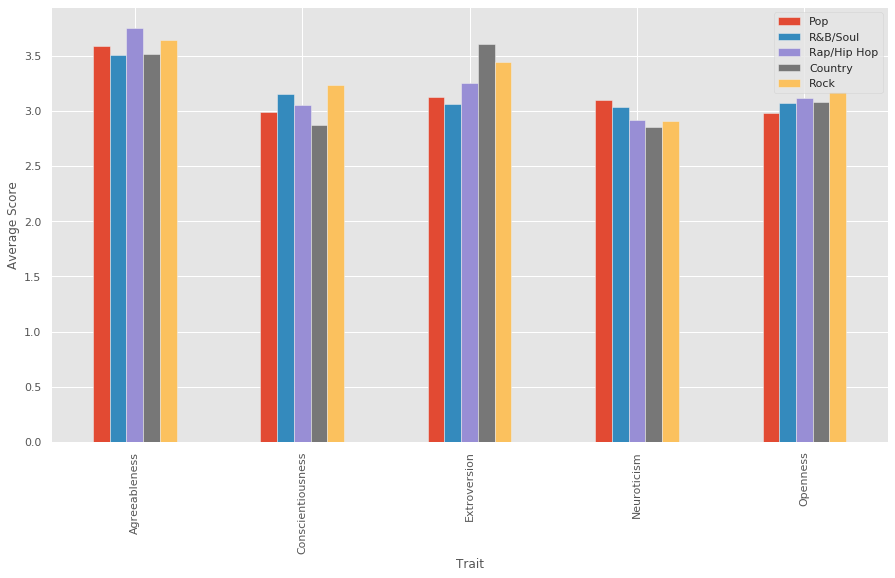

In [19]:
df.plot.bar(figsize=(15,8));
plt.ylabel('Average Score');
plt.show()

In [20]:
data_std = {'Pop': pop_trait_data_std, 'R&B/Soul': rbsoul_trait_data_std, 'Rap/Hip Hop': rap_trait_data_std, \
        'Country': country_trait_data_std, 'Rock': rock_trait_data_std}
df_std = pd.concat(data_std, axis = 1)
df_std.head(20)

,Pop,R&B/Soul,Rap/Hip Hop,Country,Rock
Trait,,,,,
Agreeableness,0.589418,0.815037,0.697084,0.999813,0.674699
Conscientiousness,0.454634,0.524783,0.597526,0.645859,0.492776
Extroversion,0.619730,0.676420,0.688041,0.764680,0.687748
Neuroticism,0.405487,0.522000,0.822931,0.825092,0.621943
Openness,0.539809,0.510001,0.517960,0.879241,0.446581


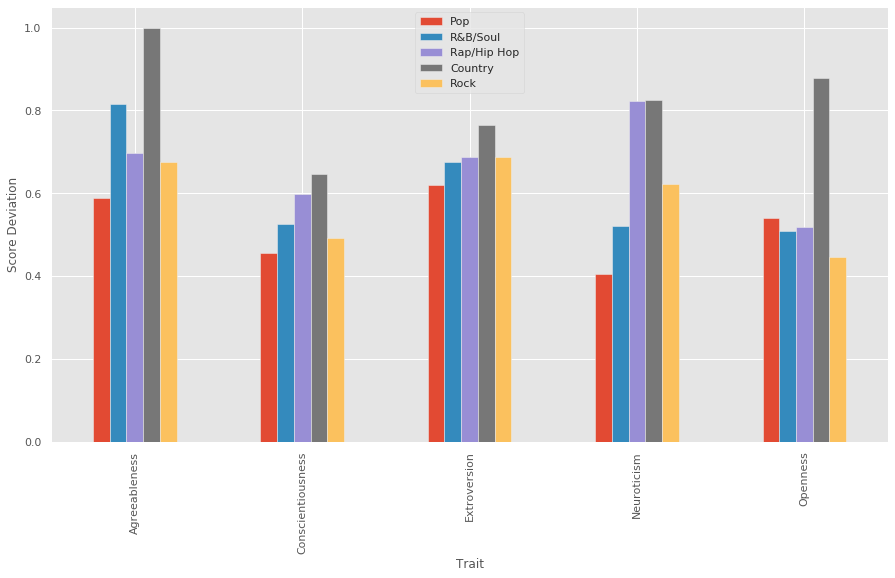

In [21]:
df_std.plot.bar(figsize=(15,8));
plt.ylabel('Score Deviation');
plt.show()

In [22]:
pop_df[pop_df['Trait'] == 'Extroversion']['Real Score'].array

<PandasArray>
[2.5999999999999996,                2.4,                3.5,
  3.566666666666667, 3.3666666666666667, 3.2333333333333334,
 2.3666666666666663, 3.4333333333333336,                4.2,
  2.333333333333333, 3.7666666666666666, 2.7333333333333334]
Length: 12, dtype: float64

In [23]:
rbsoul_df[rbsoul_df['Trait'] == 'Extroversion']['Real Score'].array

<PandasArray>
[              2.25,                2.0,  3.166666666666667,
 3.3333333333333335,                3.5,              3.125,
 2.5416666666666665, 3.7083333333333335,  4.208333333333334,
  2.458333333333333,               3.75,  2.708333333333333]
Length: 12, dtype: float64

In [24]:
rap_df[rap_df['Trait'] == 'Extroversion']['Real Score'].array

<PandasArray>
[ 2.466666666666667, 2.0666666666666664, 3.9333333333333336,
 3.4000000000000004, 3.1333333333333337,  3.666666666666667,
 2.7333333333333334,  3.666666666666667,  4.466666666666667,
 2.5999999999999996,  3.666666666666667, 3.2666666666666666]
Length: 12, dtype: float64

In [25]:
country_df[country_df['Trait'] == 'Extroversion']['Real Score'].array

<PandasArray>
[ 3.222222222222222,  3.222222222222222,  4.555555555555555,
 3.8888888888888893, 3.4444444444444446,  3.666666666666667,
  3.222222222222222, 2.5555555555555554,  4.777777777777778,
 2.5555555555555554,  4.777777777777778, 3.4444444444444446]
Length: 12, dtype: float64

In [26]:
rock_df[rock_df['Trait'] == 'Extroversion']['Real Score'].array

<PandasArray>
[               3.0, 2.8666666666666663, 3.4000000000000004,
  4.466666666666667, 3.9333333333333336, 3.9333333333333336,
  2.333333333333333,  3.533333333333333,  4.466666666666667,
 2.5999999999999996,  3.666666666666667, 3.1333333333333333]
Length: 12, dtype: float64

In [27]:
df + df_std

,Pop,R&B/Soul,Rap/Hip Hop,Country,Rock
Trait,,,,,
Agreeableness,4.182547,4.318510,4.452639,4.518331,4.319144
Conscientiousness,3.446300,3.674089,3.653081,3.516230,3.726109
Extroversion,3.744730,3.738920,3.943597,4.375792,4.132192
Neuroticism,3.500725,3.554738,3.737217,3.682234,3.526705
Openness,3.518597,3.581971,3.639172,3.960049,3.616278
